In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
random.seed(0)

import tensorflow as tf
from tensorflow import keras

In [98]:
data = np.load('fashion_mnist_dataset_train.npy',allow_pickle=True)
X = data.item()['features']
y = data.item()['target']

In [99]:
X.shape

(60000, 28, 28)

In [100]:
y.shape

(60000,)

In [101]:
y = keras.utils.to_categorical(y)

In [107]:
# Get X_train, y_train, X_val, y_val, X_test, y_test:
indexes = np.arange(X.shape[0])
for _ in range(8): indexes = np.random.permutation(indexes)  # shuffle 8 times
X = X[indexes]
y = y[indexes]

train_value = int(0.8*X.shape[0])
test_value = int(0.95*X.shape[0])

X_train = X[:train_value]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
y_train = y[:train_value]

X_val = X[train_value:test_value]
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
y_val = y[train_value:test_value]

X_test = X[test_value:]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
y_test = y[test_value:]

In [113]:
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [108]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [166]:
K.clear_session()
results2=[]

model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
           input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)), 

    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    
    Dense(6, activation='softmax')
])

optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.08)

history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=32,
          epochs=15, 
          verbose = 1, 
          callbacks = es
                   )
results2.append(history)

Epoch 1/15
1500/1500 [==============================] - 61s 40ms/step - loss: 0.6981 - accuracy: 0.7282 - val_loss: 0.6100 - val_accuracy: 0.7523
Epoch 2/15
1500/1500 [==============================] - 62s 41ms/step - loss: 0.4260 - accuracy: 0.8289 - val_loss: 0.3906 - val_accuracy: 0.8360
Epoch 3/15
1500/1500 [==============================] - 59s 39ms/step - loss: 0.3662 - accuracy: 0.8538 - val_loss: 0.2921 - val_accuracy: 0.8840
Epoch 4/15
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3219 - accuracy: 0.8736 - val_loss: 0.2415 - val_accuracy: 0.9082
Epoch 5/15
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2985 - accuracy: 0.8840 - val_loss: 0.2961 - val_accuracy: 0.8808
Epoch 6/15
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2853 - accuracy: 0.8876 - val_loss: 0.2570 - val_accuracy: 0.8976
Epoch 7/15
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2609 - accuracy: 0.8973 - val_loss: 0.3336 -

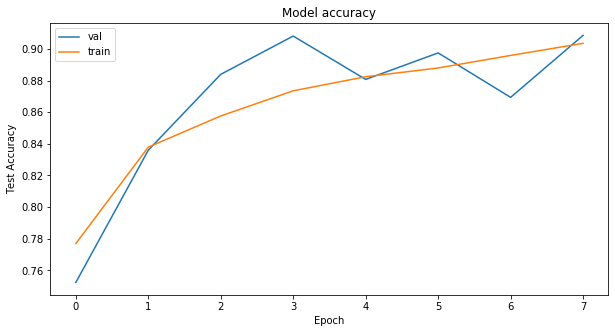

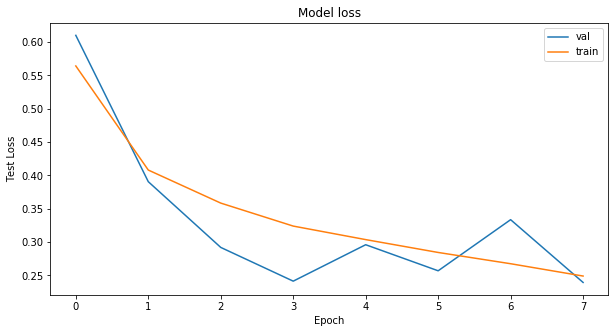

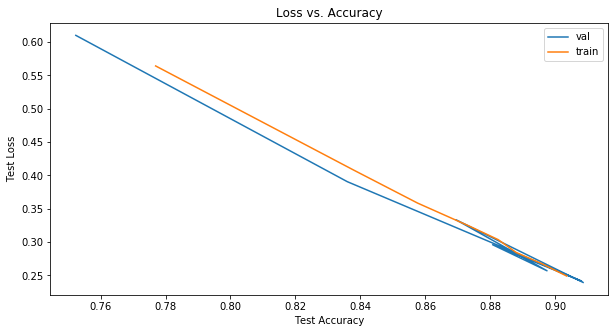

In [167]:
plt.figure(figsize=(10,5))
for act in results2:
    plt.plot(act.history["val_accuracy"])
    plt.plot(act.history["accuracy"])
    
plt.title('Model accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.legend(['val','train'])
plt.show()


plt.figure(figsize=(10,5))
for ast in results2:
    plt.plot(ast.history['val_loss'])
    plt.plot(act.history["loss"])
    
plt.title('Model loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['val','train'])
plt.show()

plt.figure(figsize=(10,5))
for ast in results2:
    plt.plot(act.history["val_accuracy"], ast.history['val_loss'])
    plt.plot(act.history["accuracy"], ast.history['loss'])
plt.title('Loss vs. Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['val','train'])
plt.show()

In [168]:
loss, accuracy = model.evaluate(X_test,y_test)
print("Accuracy", accuracy)

94/94 [==============================] - 1s 8ms/step - loss: 0.2446 - accuracy: 0.9023
Accuracy 0.9023333191871643


In [171]:
yB = model.predict(X_test)
yB = yB.round(decimals=0)
yA = y_test
from sklearn.metrics import classification_report
print(classification_report(yA, yB))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      0.88      0.91       601
           2       0.89      0.87      0.88       605
           3       0.86      0.87      0.87       603
           4       0.92      0.90      0.91       586
           5       0.93      0.98      0.95       605

   micro avg       0.91      0.90      0.90      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.91      0.90      0.90      3000
 samples avg       0.90      0.90      0.90      3000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

# Kaggle

In [180]:
data_test = np.load('fashion_mnist_dataset_kaggle_test.npy',allow_pickle=True)

In [185]:
test_X = data_test.item()['features']
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], test_X.shape[2], 1))

In [186]:
test_X.shape

(10000, 28, 28, 1)

In [187]:
test_y = model.predict(test_X)
test_y = test_y.round(decimals=0)

In [188]:
pred = []
for i in range(len(test_y)):
    if test_y[i][0] == 1:
        pred.append(0)
    elif test_y[i][1] == 1:
        pred.append(1)
    elif test_y[i][2] == 1:
        pred.append(2)
    elif test_y[i][3] == 1:
        pred.append(3)
    elif test_y[i][4] == 1:
        pred.append(4)
    else:
        pred.append(5)

In [189]:
predictions = pd.DataFrame(pred,columns=['target'])
predictions['id'] = predictions.index

In [190]:
predictions = predictions[['id','target']]
predictions.to_csv('predictions_mnist.csv',index=False)

In [191]:
predictions

,id,target
0,0,4
1,1,3
2,2,2
3,3,1
4,4,1
...,...,...
9995,9995,4
9996,9996,1
9997,9997,4
9998,9998,2
